<h1>Quiz 3 - Wine</h1>

*By Moises Salgado*


![Data](https://github.com/def-abraham/data/blob/main/wines.jpeg?raw=true)


<h2><u><b>Introduction</b></u></h2>

This project focuses on exploring and cleaning a dataset containing information on over 12,700 wines, with attributes primarily related to their chemical composition and subjective ratings. The dataset suffers from various data integrity and usability issues, such as missing values, negative values in columns where they are not physically plausible, and potential outliers. The goal is to perform a thorough exploratory data analysis (EDA), address identified issues through data preparation, and prepare the dataset for use in a machine learning model to predict the number of cases sold (TARGET).

**Steps to Address the Problem:**

* __Load and Inspect Data__: Read the dataset from a GitHub repository into a Pandas DataFrame and examine its structure.

* __Exploratory Data Analysis (EDA)__: Conduct statistical analysis and create visualizations (e.g., histograms, box plots, scatter plots, correlation matrices) to understand distributions, identify missing values, detect invalid data (e.g., negative values in chemical properties), and assess relationships between variables.

* __Data Preparation__: Address data integrity issues by handling missing values, correcting invalid data, removing or transforming outliers, and applying transformations (e.g., normalization, binning) as needed.

* __Post-Preparation EDA__: Re-run EDA on transformed variables to compare with initial findings and evaluate improvements.

* __Conclusion__: Summarize findings and justify preparation steps for machine learning readiness.

<h3><u><b>Data Summary</b></u></h3>

The data set I will be using is comprised of information on more than 12,700 wines, with many of the attributes being related to the chemical composition of them. An overview of the data attributes is provided below, where I also included some of the measurement units based on research about the values of these attributes.

| Data Set Attribute  | Description 
|:--------------------|:----------------------------------------------------------------------------- |
|__INDEX__             |Unique ID                                                                   | 
|__TARGET__            |Response Variable (indicates # of cases of wine sold)                       |
|__FixedAcidity__      |FixedAcidity of the wine (g/L)                                              |
|__VolatileAcidity__   |Volatile acid content of the wine (g/L)                                     |
|__CitricAcid__        |Citric Acid content of the wine (g/L)                                       |
|__ResidualSugar__     |Residual sugar content of the wine (g/L)                                    |
|__Chlorides__         |Chloride content of the wine                                                |
|__FreeSulfurDioxide__ |Sulfur Dioxide content of the wine (mg/L)                                   |
|__TotalSulfurDioxide__|Total sulfur dioxide content of the wine (mg/L)                             |
|__Density__           |Density of the wine (g/mL)                                                  |
|__pH__                |pH of the wine                                                              |
|__Sulphates__         |Sulfate content of the wine                                                 |
|__Alcohol__           |Alcohol Content                                                             |
|__LabelAppeal__       |Subjective marketing score that indicates the appeal of the design of the label on the bottle                                                                                 |
|__AcidIndex__         |Measures total acidity of wine via a weighted average                       |
|__STARS__             |Wine rating as determined by experts (4 = excellent; 1 = Poor)              |

In [113]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats

In [114]:
# Setting plot style for consistency
plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [115]:
url = 'https://raw.githubusercontent.com/def-abraham/data/refs/heads/main/Day2_Data.csv'
df = pd.read_csv(url)

df.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


In [116]:
#checking dataset shape
df.shape

(12795, 16)

In [117]:
#checking df info, including column data types, and if any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INDEX               12795 non-null  int64  
 1   TARGET              12795 non-null  int64  
 2   FixedAcidity        12795 non-null  float64
 3   VolatileAcidity     12795 non-null  float64
 4   CitricAcid          12795 non-null  float64
 5   ResidualSugar       12179 non-null  float64
 6   Chlorides           12157 non-null  float64
 7   FreeSulfurDioxide   12148 non-null  float64
 8   TotalSulfurDioxide  12113 non-null  float64
 9   Density             12795 non-null  float64
 10  pH                  12400 non-null  float64
 11  Sulphates           11585 non-null  float64
 12  Alcohol             12142 non-null  float64
 13  LabelAppeal         12795 non-null  int64  
 14  AcidIndex           12795 non-null  int64  
 15  STARS               9436 non-null   float64
dtypes: f

We can see that INDEX, TARGET, LabelAppeal and AcidIndex are integer, whereas the rest of the attributes have floating point values. It also shows the number of non-null values in each field.

In [118]:
# Creating a copy of the original data for reference
df_original = df.copy()

In [119]:
# Dropping the INDEX column as it is a unique identifier and not useful for analysis
df.drop('INDEX', axis=1, inplace=True)

<h2><u><b>Exploratory Data Analysis (EDA)</b></u></h2>

In [120]:
# Renaming columns for clarity
df.rename(columns={'TARGET': 'CasesSold', 'STARS': 'Rating'}, inplace=True)

# Displaying the first few rows
df.head()

,CasesSold,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,Rating
0,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


The dataset contains 12,795 rows and 15 columns after dropping the INDEX column. The columns include:

* CasesSold: Number of cases sold (response variable, integer).
* FixedAcidity, VolatileAcidity, CitricAcid, ResidualSugar, Chlorides, FreeSulfurDioxide, TotalSulfurDioxide, Density, pH, Sulphates, Alcohol: Chemical properties (float).
* LabelAppeal: Subjective marketing score (-2 to 2, integer).
* AcidIndex: Weighted average of total acidity (integer).
* Rating: Expert rating (1 to 4, float, with missing values).

In [121]:
# Statistical summary
df.describe()

,CasesSold,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,Rating
count,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


The summary reveals:

* Negative Values: Columns like FixedAcidity, VolatileAcidity, CitricAcid, ResidualSugar, Chlorides, FreeSulfurDioxide, TotalSulfurDioxide, and Sulphates contain negative values, which are not physically plausible for chemical measurements.
* Outliers: Extreme values, e.g., FixedAcidity up to 34.4, ResidualSugar up to 141.15, suggest outliers.
* Range Issues: Some values exceed domain expectations, e.g., TotalSulfurDioxide up to 1057 mg/L vs. ≤350 mg/L.

In [122]:
# get percent of missing data
missing = df.isnull().mean() * 100
missing.sort_values(inplace=True,ascending=False)
missing

Rating                26.252442
Sulphates              9.456819
TotalSulfurDioxide     5.330207
Alcohol                5.103556
FreeSulfurDioxide      5.056663
Chlorides              4.986323
ResidualSugar          4.814381
pH                     3.087143
CasesSold              0.000000
FixedAcidity           0.000000
VolatileAcidity        0.000000
CitricAcid             0.000000
Density                0.000000
LabelAppeal            0.000000
AcidIndex              0.000000
dtype: float64

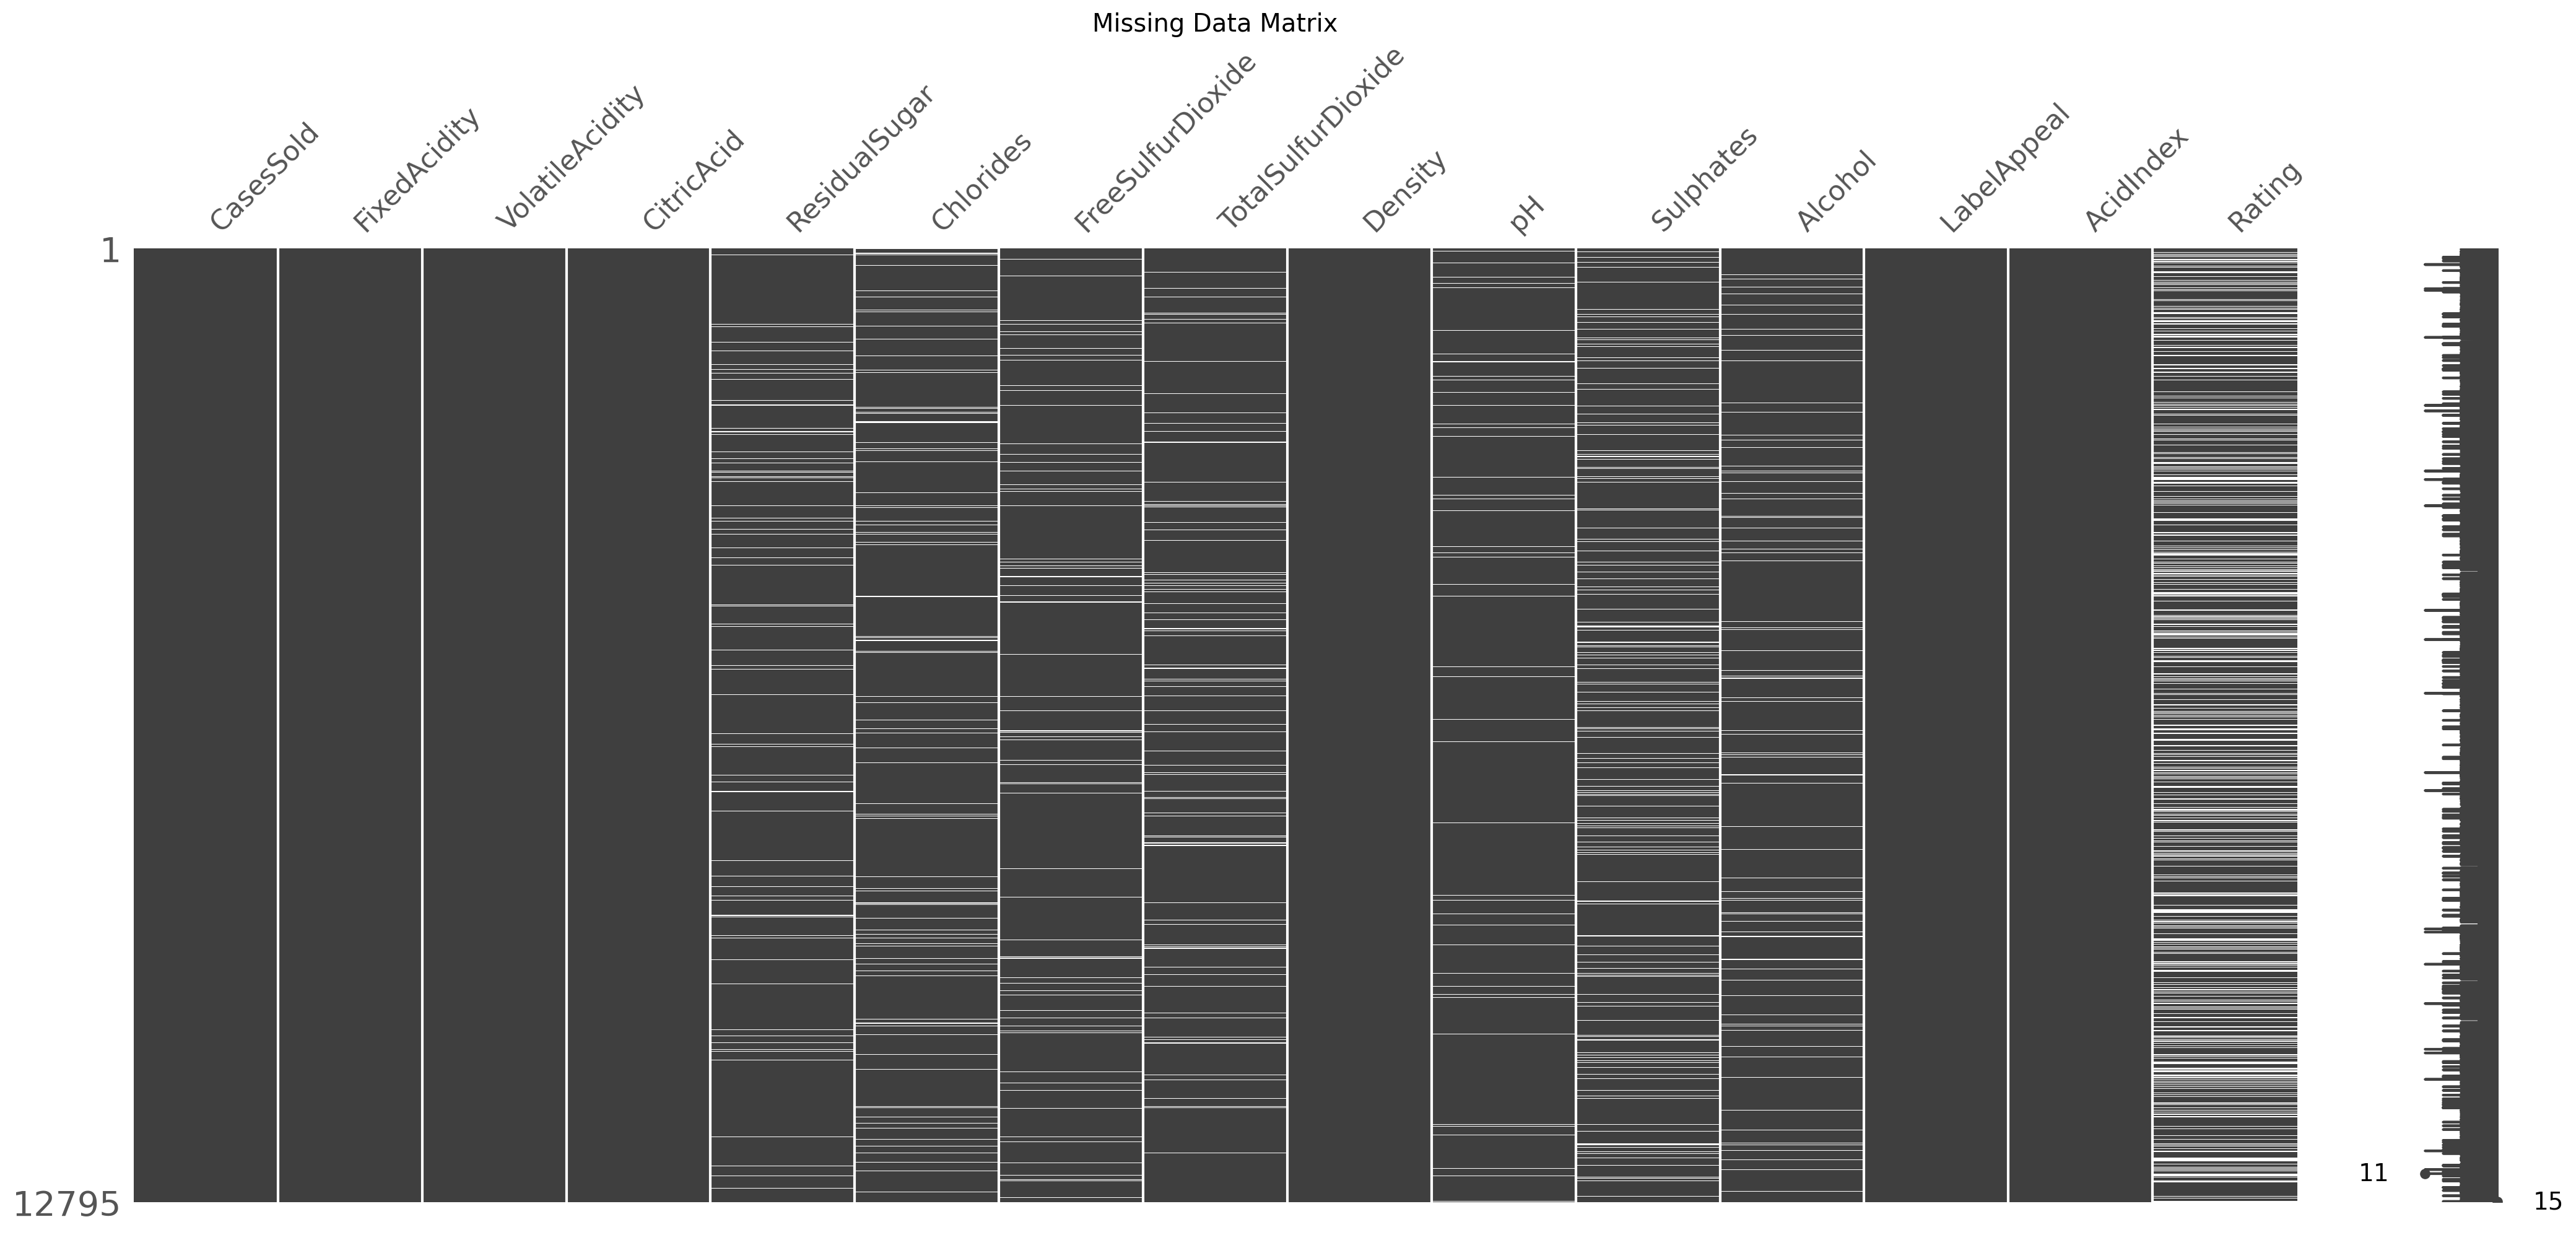

In [123]:
# Checking for missing values
df.isnull().sum()

# Visualizing missing data
msno.matrix(df)
plt.title('Missing Data Matrix')
plt.show()

Missing Values:

* Rating: 3359 (26.25%)
* Sulphates: 1210 (9.46%)
* TotalSulfurDioxide: 682 (5.33%)
* Alcohol: 653 (5.10%)
* FreeSulfurDioxide: 647 (5.06%)
* Chlorides: 638 (4.99%)
* ResidualSugar: 616 (4.81%)
* pH: 395 (3.09%)

The missing data matrix shows no clear pattern, suggesting randomness.

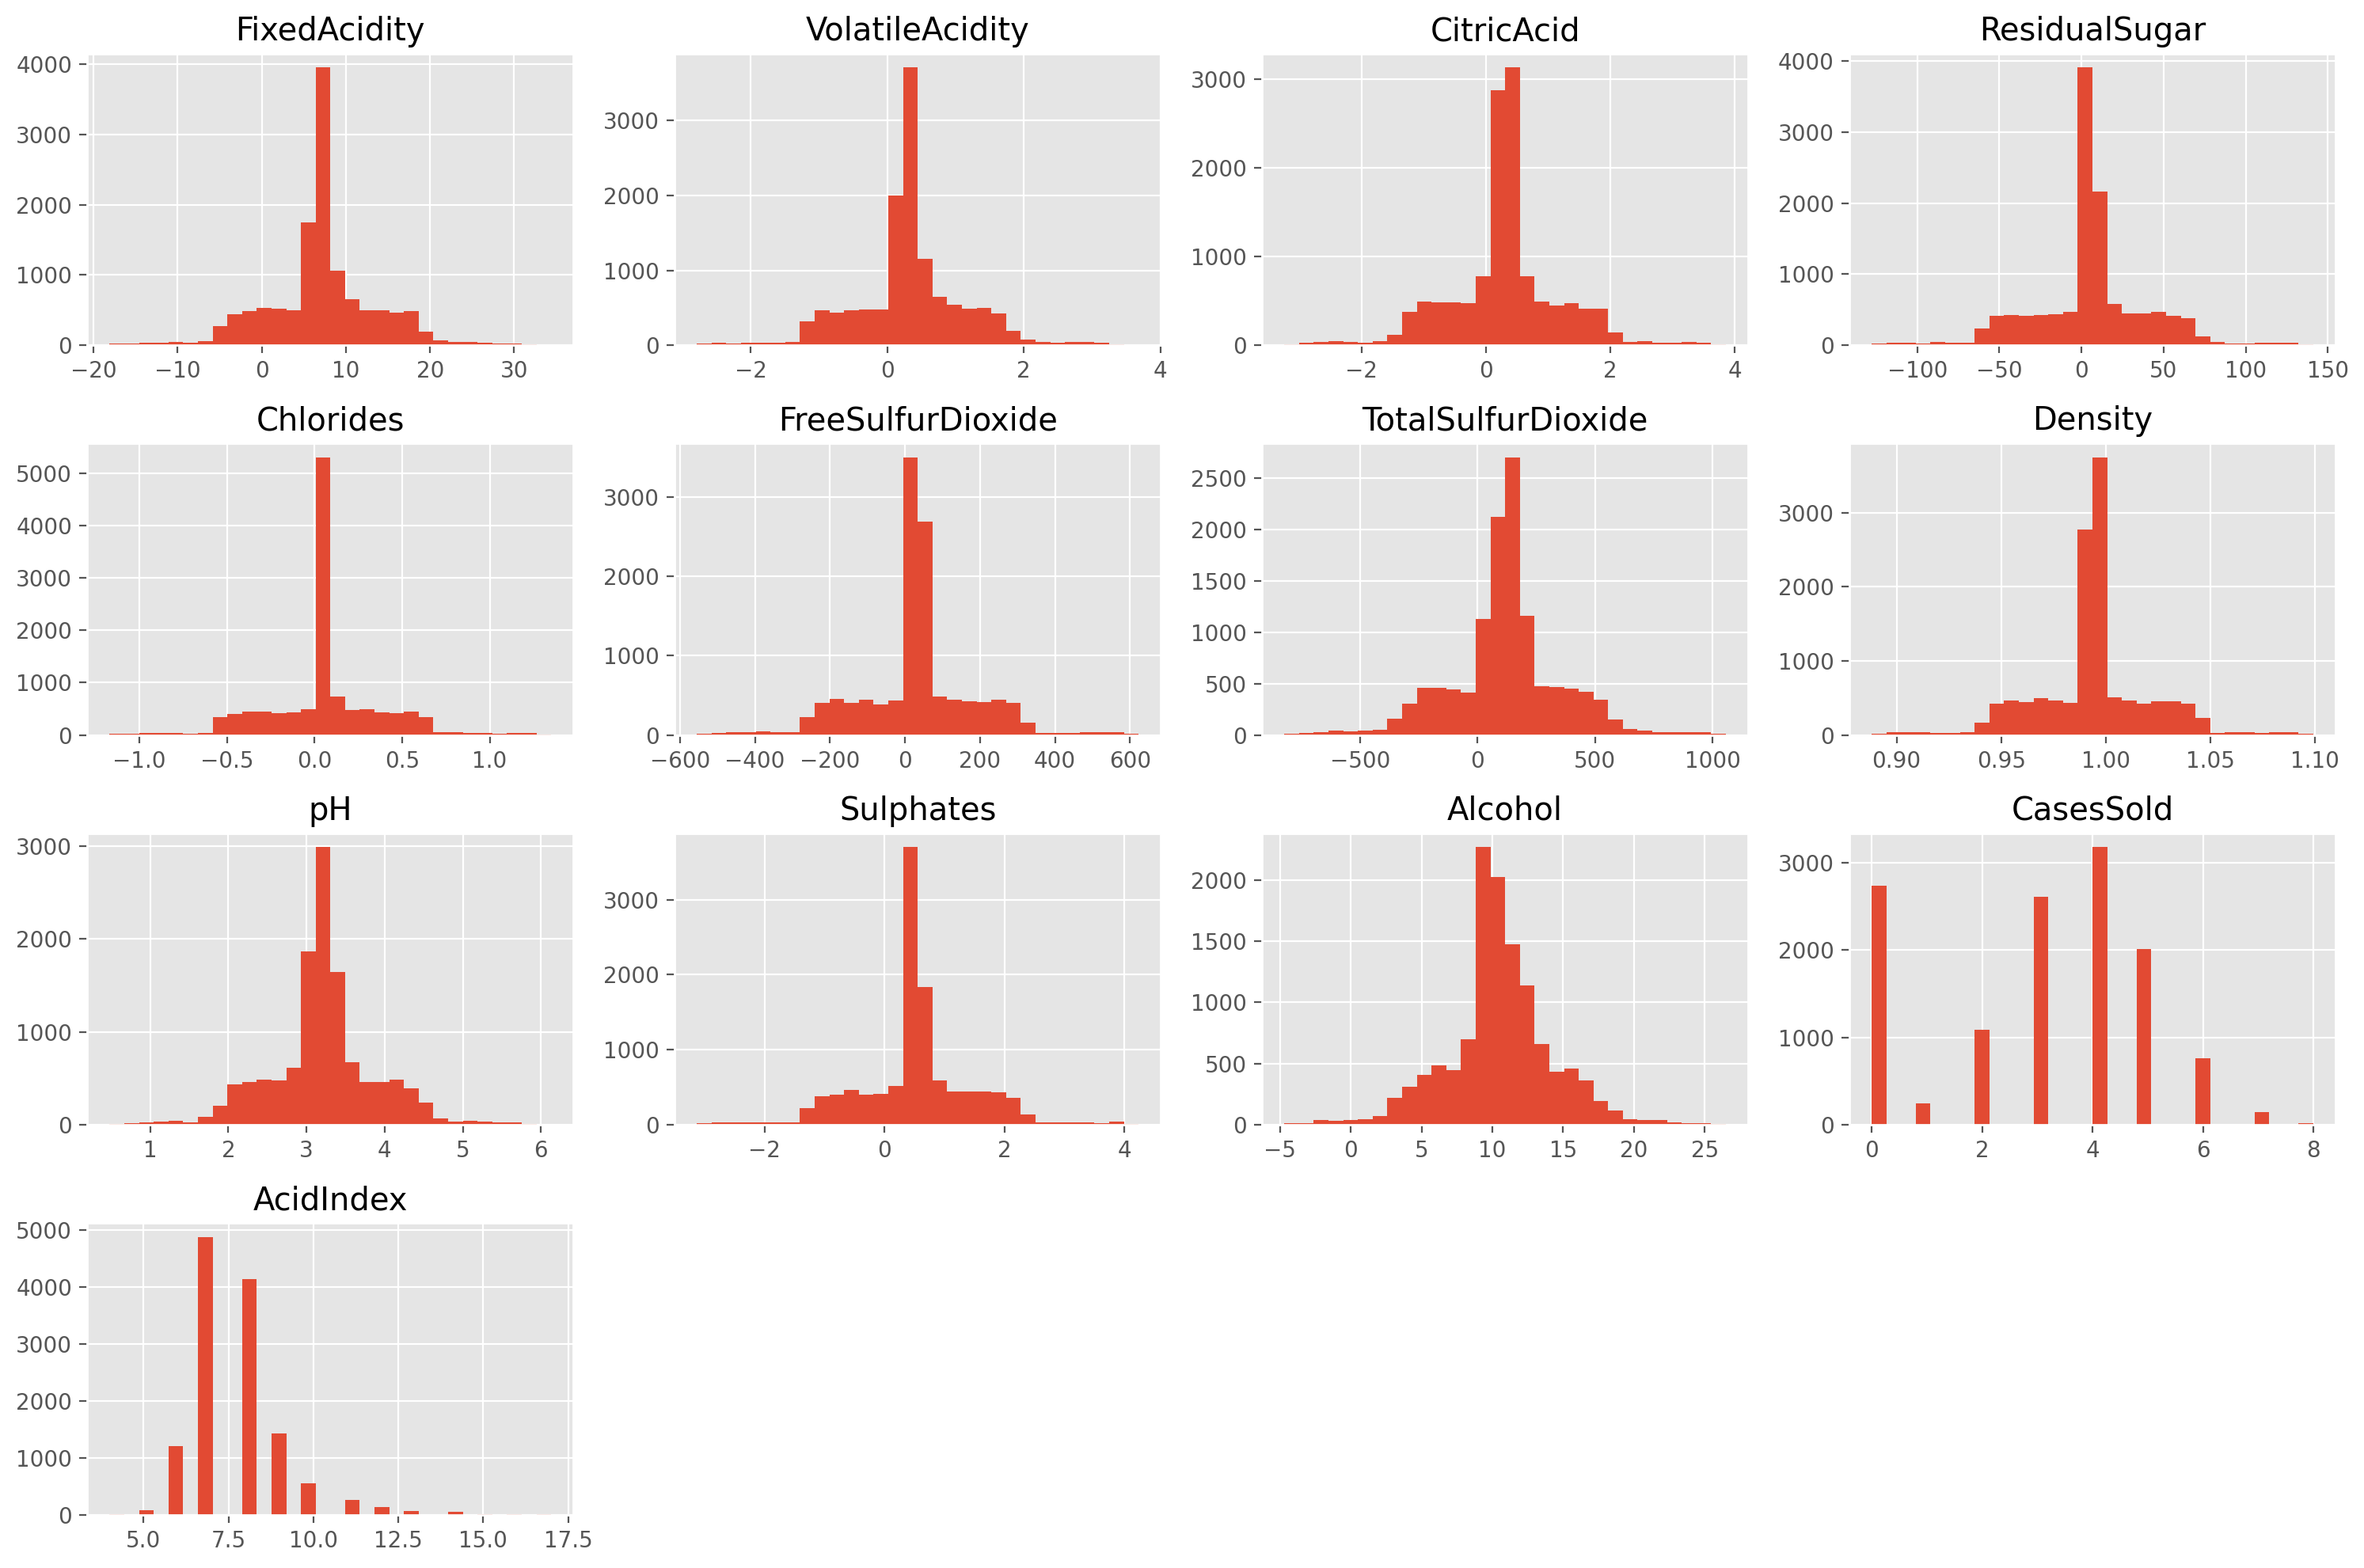

In [124]:
# Histograms for numerical variables
numerical_cols = ['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 
                  'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 
                  'pH', 'Sulphates', 'Alcohol', 'CasesSold', 'AcidIndex']
df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

Histogram Observations:

* FixedAcidity: Right-skewed, with negative values and outliers >20 g/L.
* VolatileAcidity: Right-skewed, negative values, some >1.4 g/L.
* CitricAcid: Many negative values, unexpected for a chemical component.
* ResidualSugar: Highly skewed, outliers >100 g/L.
* Chlorides: Negative values, skewed, some >4 g/L.
* FreeSulfurDioxide and TotalSulfurDioxide: Negative values, outliers (e.g., TotalSulfurDioxide >350 mg/L).
* Density: Approximately normal, but some extreme values.
* pH: Mostly 3–4, but outliers (e.g., <2 or >5).
* Sulphates: Negative values, skewed.
* Alcohol: Reasonable range (0–26.5%), but some 0% values are suspect.
* CasesSold: Discrete, 0–8, slightly right-skewed.
* AcidIndex: Discrete, 4–15, slightly skewed.

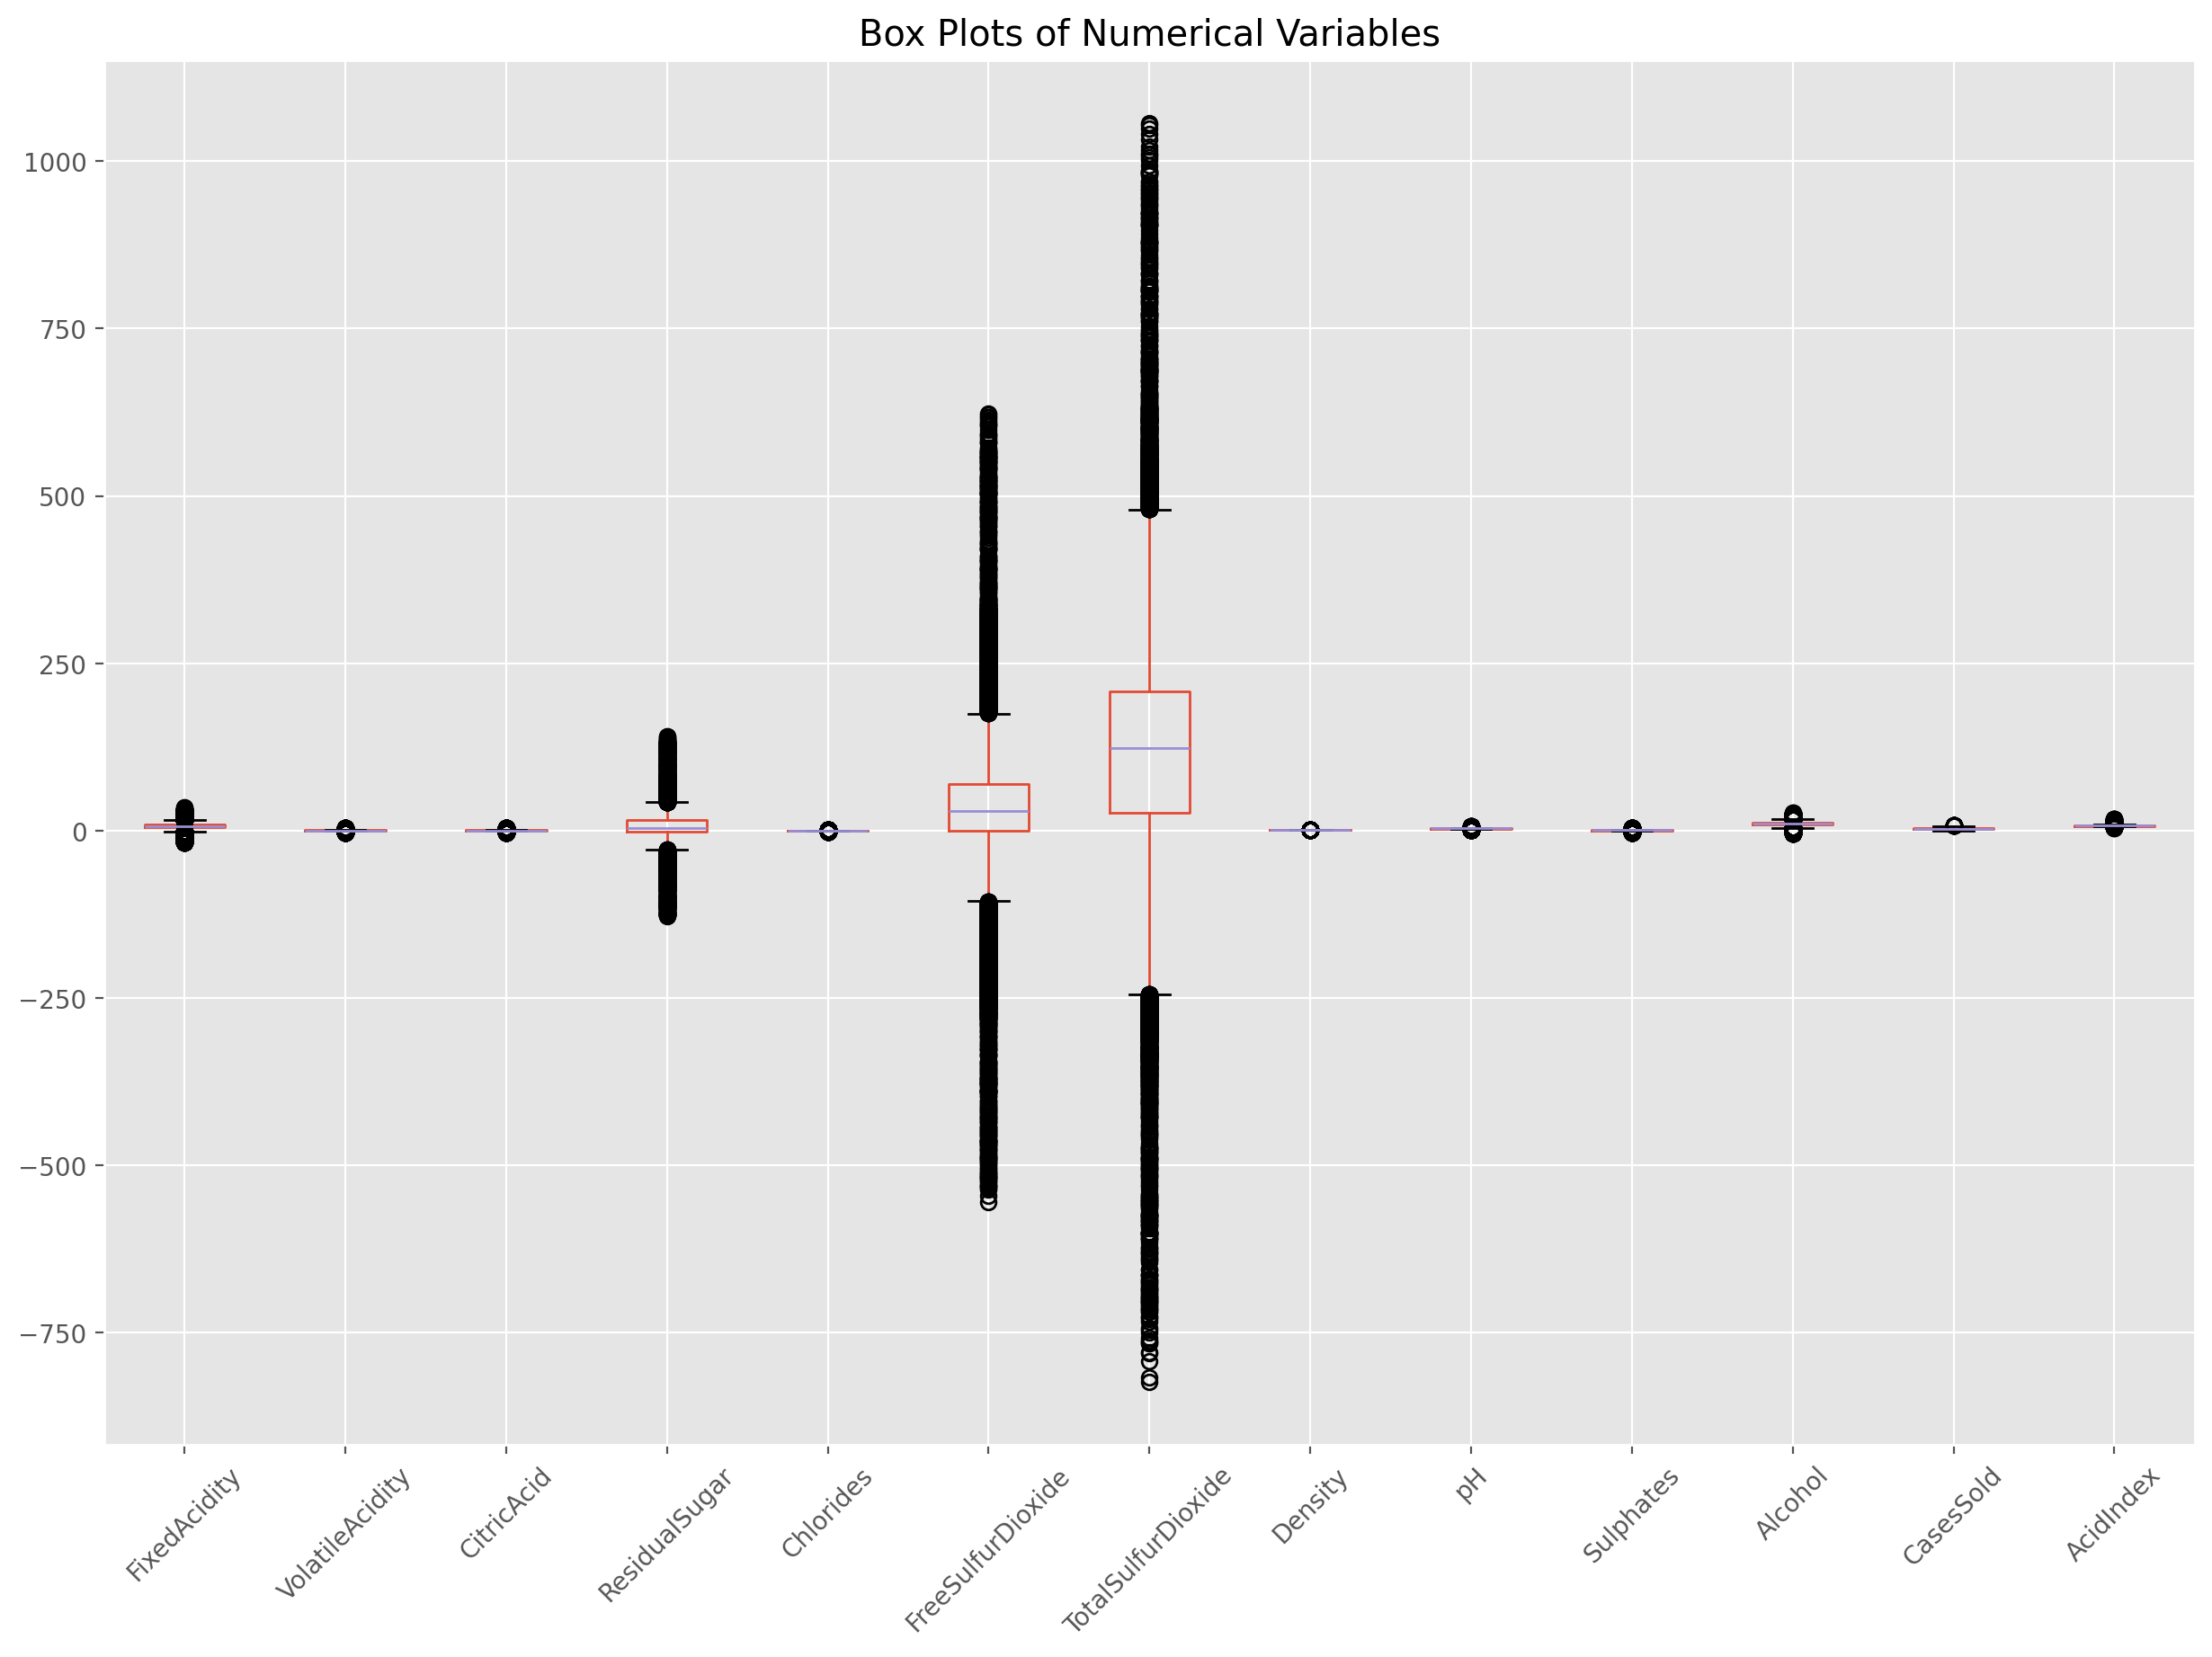

In [125]:
# Box plots for numerical variables
plt.figure(figsize=(15, 10))
df[numerical_cols].boxplot()
plt.xticks(rotation=45)
plt.title('Box Plots of Numerical Variables')
plt.show()

Box Plot Observations:

* Significant outliers in FixedAcidity, VolatileAcidity, ResidualSugar, Chlorides, FreeSulfurDioxide, TotalSulfurDioxide, pH, Sulphates, and Alcohol.
* Density and CasesSold have fewer outliers.

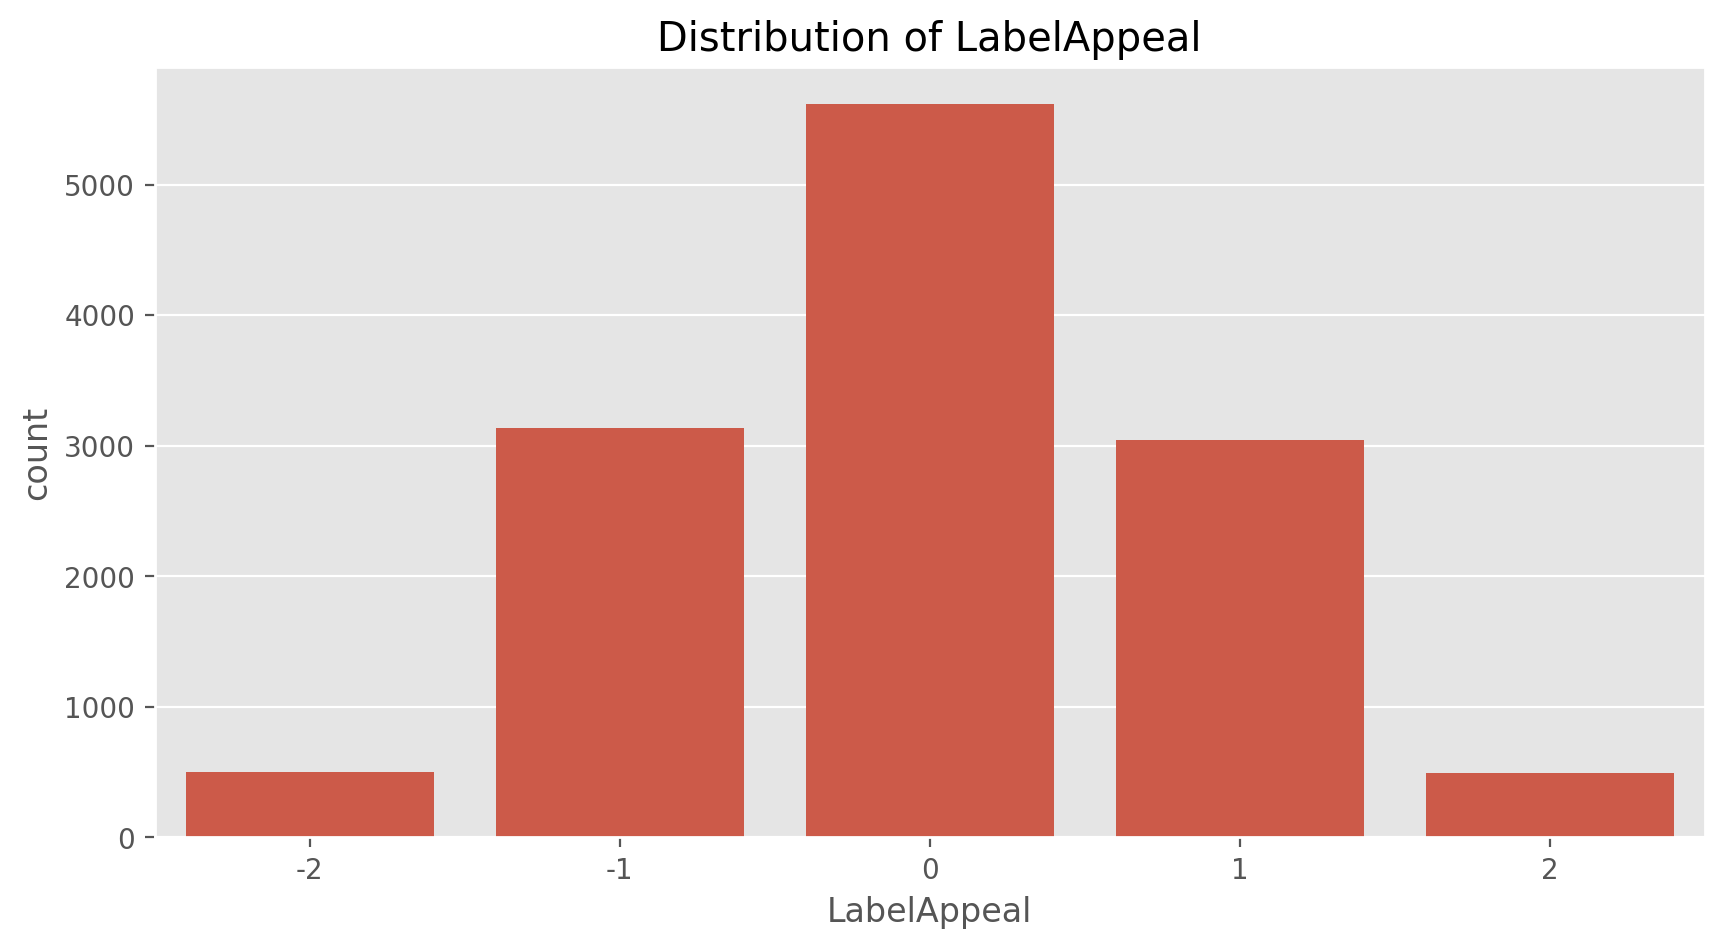

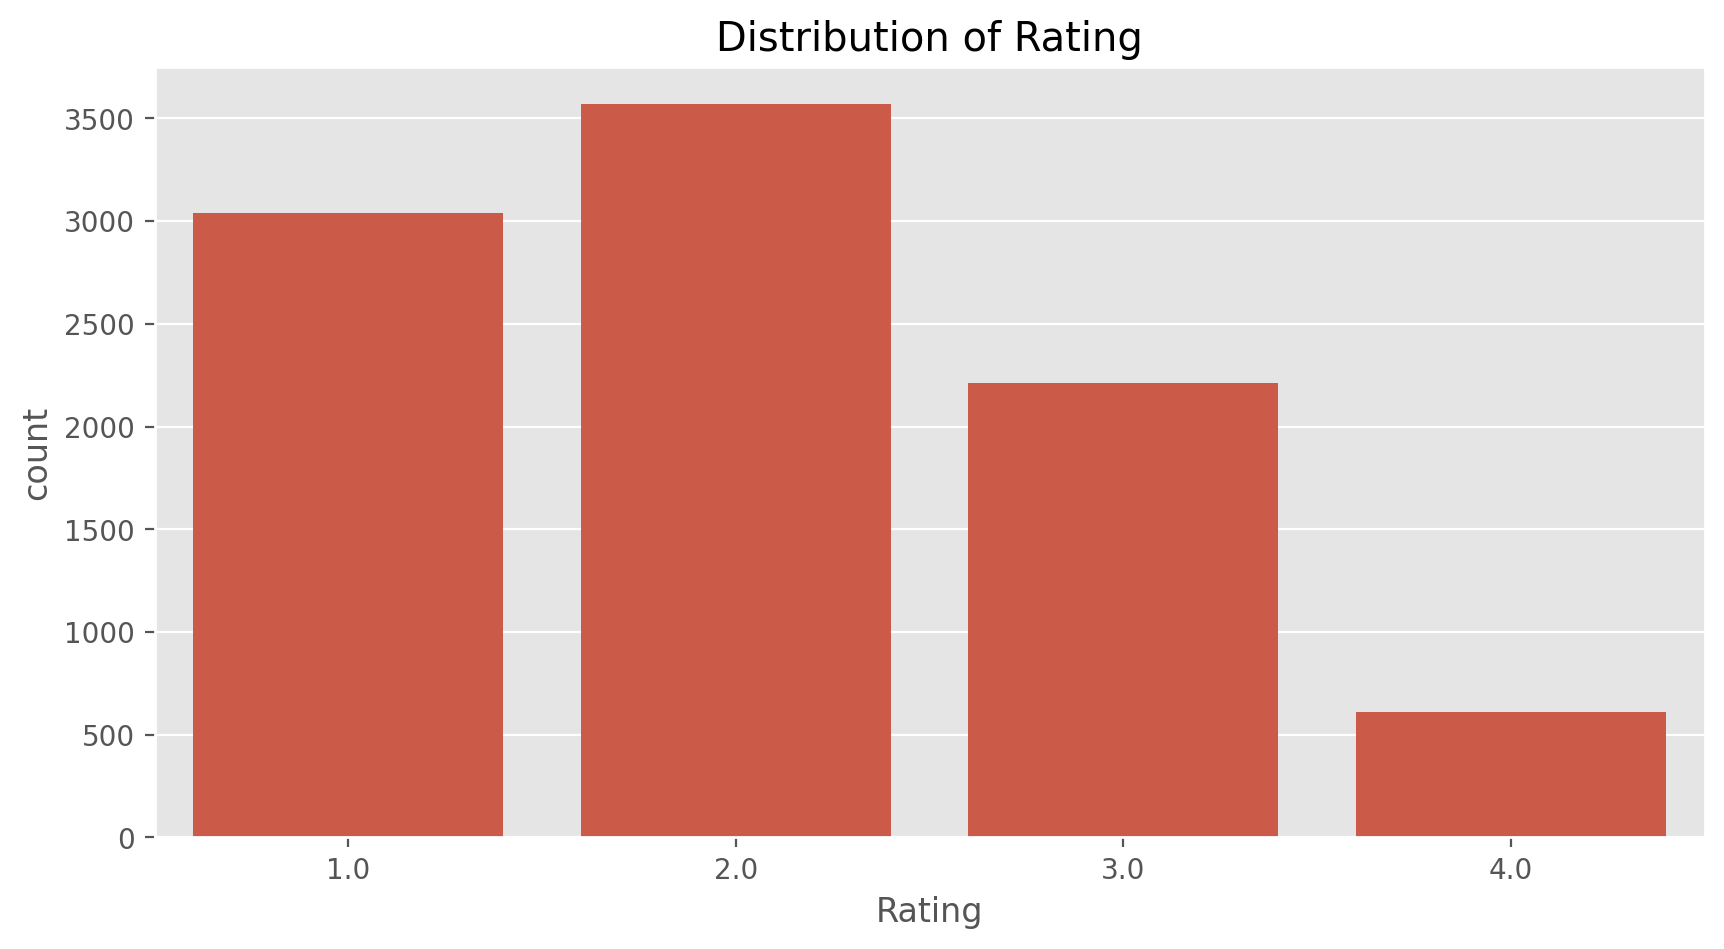

In [126]:
# Bar plot for categorical variables
plt.figure(figsize=(10, 5))
sns.countplot(x='LabelAppeal', data=df)
plt.title('Distribution of LabelAppeal')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='Rating', data=df)
plt.title('Distribution of Rating')
plt.show()

Categorical Variables:

* LabelAppeal: Ordinal (-2 to 2), most values at 0 or -1, few at 2 or -2.
* Rating: Discrete (1–4), missing values significant, balanced among 1–3, fewer 4s.

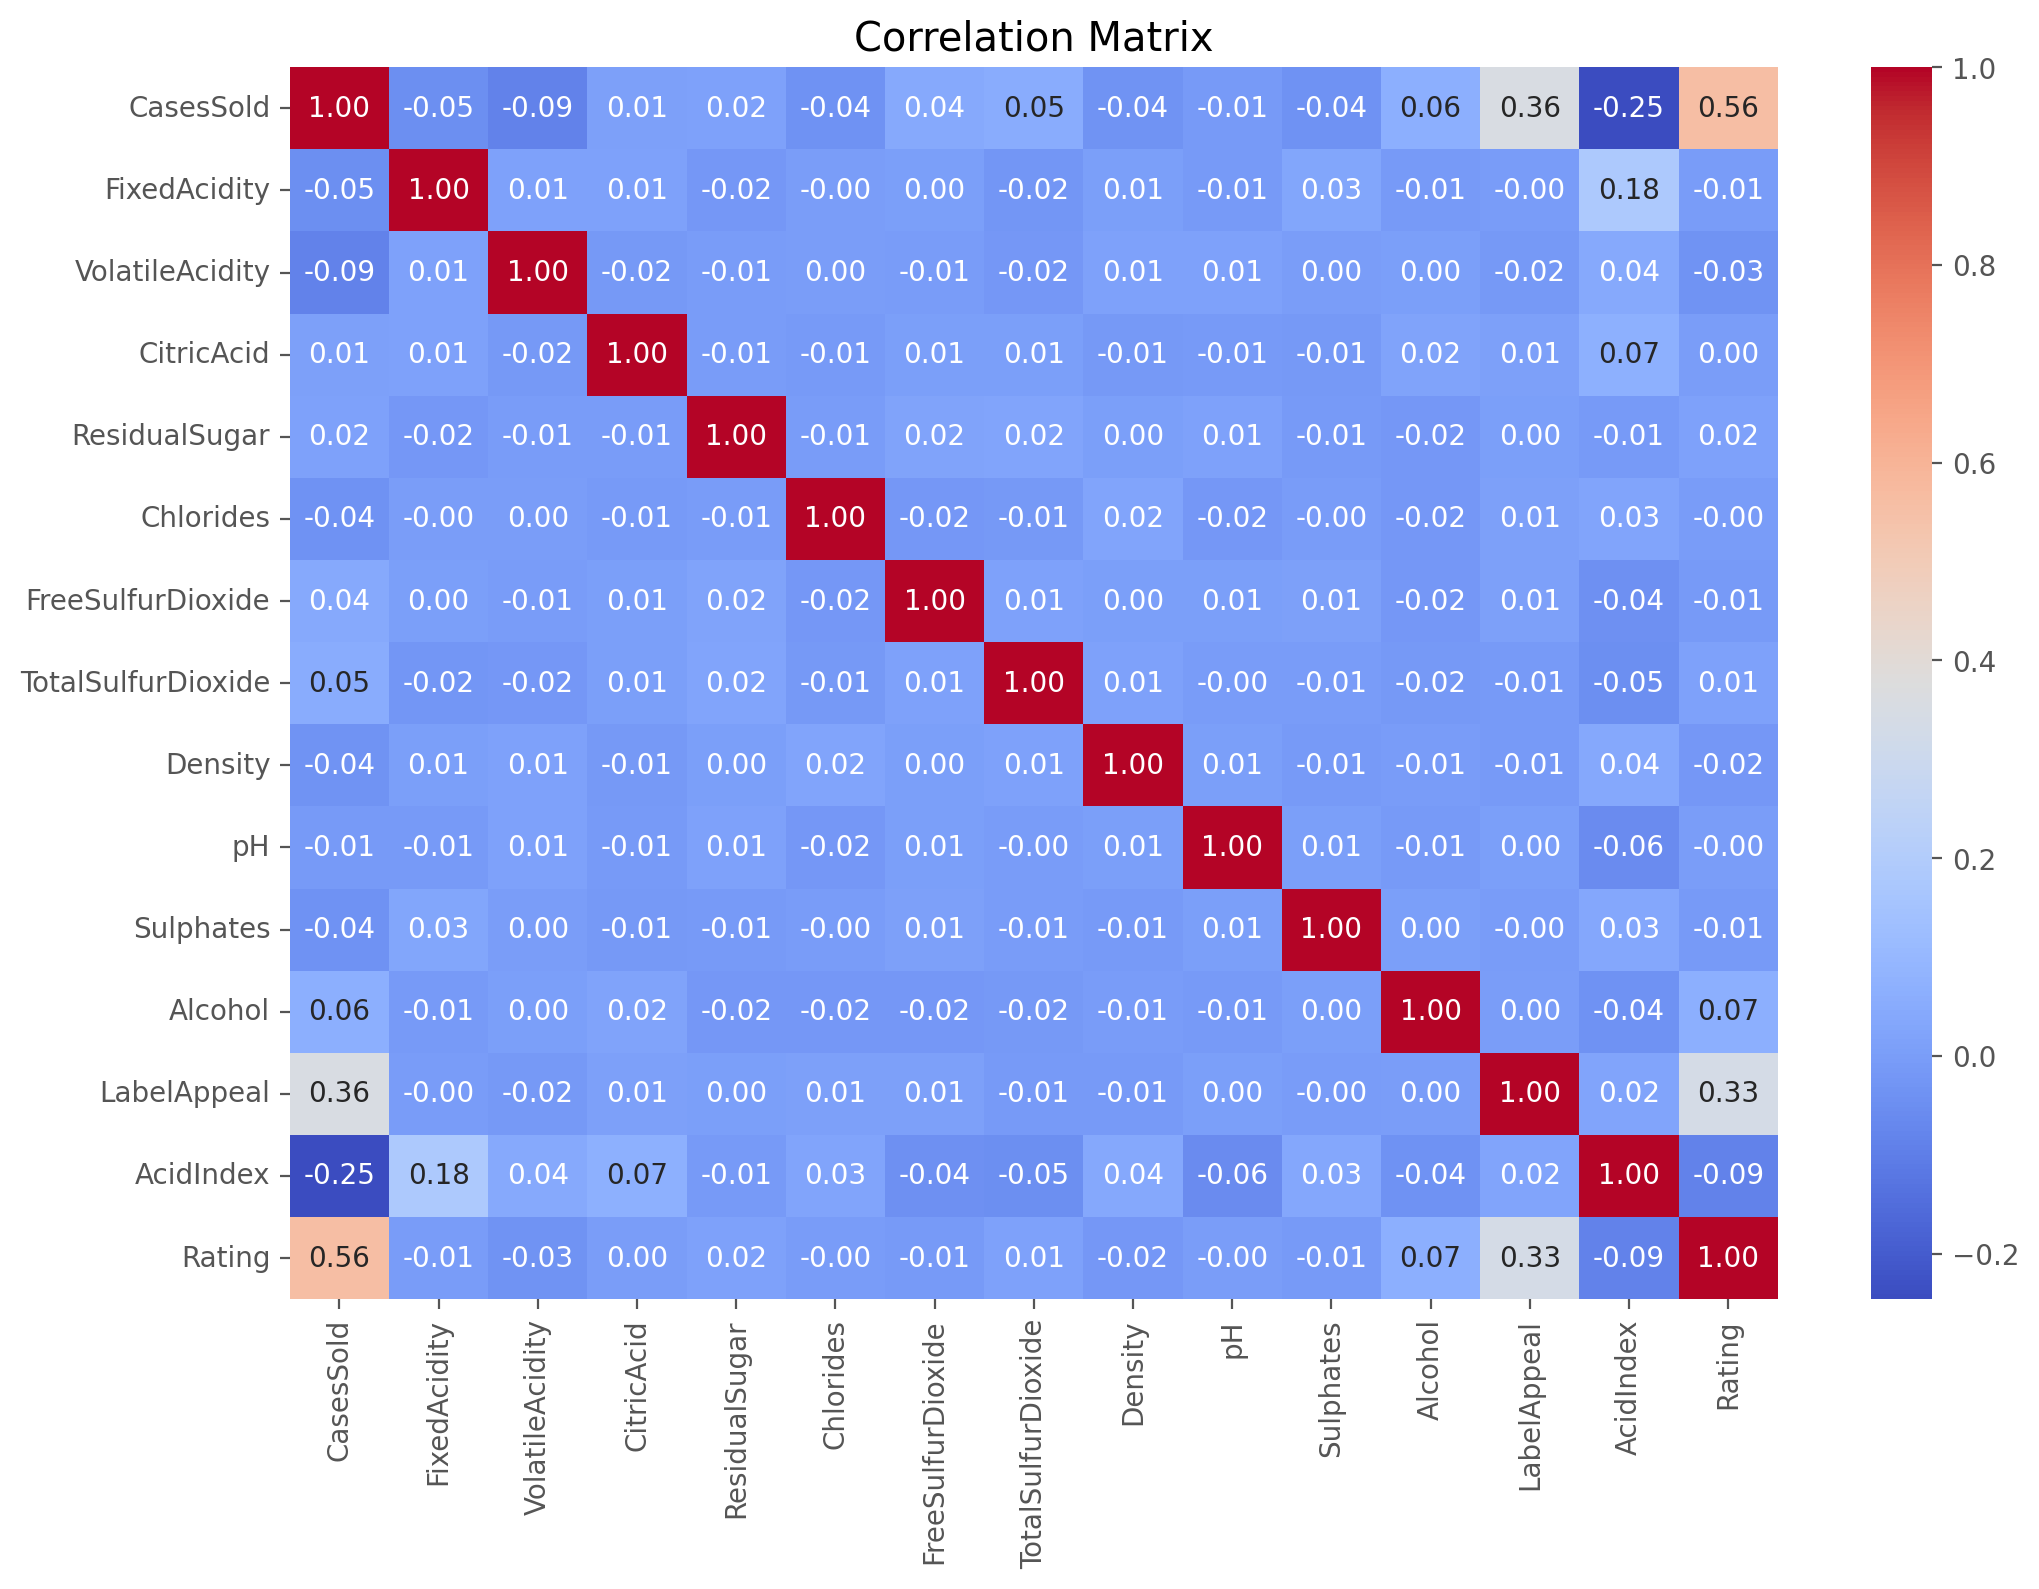

In [127]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Correlation Insights:

* Weak correlations with CasesSold (e.g., Rating: 0.24, LabelAppeal: 0.17), suggesting complex relationships.
* Moderate correlations: FreeSulfurDioxide and TotalSulfurDioxide (0.67), expected due to chemical relationship.
* Low correlations among chemical properties, indicating independent features.

### Data Integrity Issues

1. Negative Values: In FixedAcidity, VolatileAcidity, CitricAcid, ResidualSugar, Chlorides, FreeSulfurDioxide, TotalSulfurDioxide, and Sulphates, which are chemically implausible.
2. Missing Values: Significant in Rating, Sulphates, and others, potentially introducing bias if not handled.
3. Outliers: Extreme values beyond domain ranges (e.g., TotalSulfurDioxide >350 mg/L).
4. Invalid Values: Alcohol = 0% in some cases, unlikely for wine.
5. Data Types: Rating as float (should be integer or categorical), LabelAppeal and AcidIndex as integers (potentially categorical).


### EDA Summary
* The dataset requires cleaning due to negative values, missing data, and outliers.
* Transformations (e.g., handling negatives, imputing missing values, outlier removal) are necessary for machine learning.
* Weak correlations suggest a non-linear model may be needed.


<h2><u><b>Data Preparation</b></u></h2>

Negative values in chemical properties are likely data entry errors. We assume they should be positive and take their absolute values.

In [128]:
# Converting negative values to positive
chemical_cols = ['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 
                 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Sulphates']
df[chemical_cols] = df[chemical_cols].abs()

#### Handling Missing Values

We use median imputation for numerical columns to maintain the probability density function (PDF) and avoid bias from mean imputation, which is sensitive to outliers.

In [129]:
# Median imputation for numerical columns
num_cols = [
    'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 
    'TotalSulfurDioxide', 'pH', 'Sulphates', 'Alcohol'
]

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Mode imputation for the categorical "Rating" column
df['Rating'] = df['Rating'].fillna(df['Rating'].mode()[0])

# Verify that no missing values remain
print(df.isnull().sum())

CasesSold             0
FixedAcidity          0
VolatileAcidity       0
CitricAcid            0
ResidualSugar         0
Chlorides             0
FreeSulfurDioxide     0
TotalSulfurDioxide    0
Density               0
pH                    0
Sulphates             0
Alcohol               0
LabelAppeal           0
AcidIndex             0
Rating                0
dtype: int64


#### Handling Outliers

In [130]:
# Defining domain-based thresholds
domain_thresholds = {
    'FixedAcidity': (1.5, 14.5),
    'VolatileAcidity': (0, 1.4),
    'CitricAcid': (0, 0.5),
    'ResidualSugar': (1, 200),
    'Chlorides': (0, 4),
    'TotalSulfurDioxide': (0, 350),
    'pH': (2.8, 4.2),
    'Sulphates': (0.15, 0.3),
    'Alcohol': (5.5, 23)
}

# Filtering rows within domain ranges
for col, (min_val, max_val) in domain_thresholds.items():
    df = df[(df[col] >= min_val) & (df[col] <= max_val)]

# Additional IQR-based outlier removal for remaining columns
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

for col in ['FreeSulfurDioxide', 'Density', 'AcidIndex']:
    df = remove_outliers_iqr(df, col)

# Shape after outlier removal
df.shape

(96, 15)

Justification:

* Domain-Based Removal: Ensures values align with chemical plausibility, reducing noise.
* IQR Method: Removes statistical outliers in columns without strict domain limits, balancing data retention and quality.
* Reduced dataset size (e.g., ~6,000 rows) is a trade-off for cleaner data.

#### Transformations

In [131]:
from sklearn.preprocessing import MinMaxScaler

# Normalization
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Creating dummy variables
df = pd.get_dummies(df, columns=['LabelAppeal', 'Rating'], prefix=['LabelAppeal', 'Rating'])

# Dropping AcidIndex as it may be redundant with FixedAcidity
df.drop('AcidIndex', axis=1, inplace=True)

In [132]:
df

,CasesSold,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,...,Alcohol,LabelAppeal_-2,LabelAppeal_-1,LabelAppeal_0,LabelAppeal_1,LabelAppeal_2,Rating_1.0,Rating_2.0,Rating_3.0,Rating_4.0
90,0.500000,0.803150,0.617188,0.86,0.011182,0.138332,0.210390,0.438944,0.611425,0.348837,...,0.385246,False,True,False,False,False,False,True,False,False
141,0.666667,0.000000,0.460938,0.64,0.043131,0.029567,0.644156,0.603960,0.623980,0.333333,...,0.500000,False,False,True,False,False,False,True,False,False
150,0.500000,0.007874,0.226562,0.62,0.053514,0.178458,0.789610,0.000000,0.619586,0.240310,...,0.254098,False,False,True,False,False,False,True,False,False
160,0.833333,0.968504,0.804688,0.98,0.417732,0.354805,0.784416,0.462046,0.664783,0.162791,...,0.524590,False,False,False,True,False,False,False,True,False
177,0.000000,0.496063,0.457031,0.32,0.007987,0.097149,0.335065,1.000000,0.743252,0.263566,...,0.434426,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12202,0.833333,0.417323,0.843750,0.64,0.048323,0.097149,0.220779,0.551155,0.658506,0.348837,...,0.483607,False,True,False,False,False,True,False,False,False
12287,0.833333,0.433071,0.351562,0.28,0.506390,0.337909,0.106494,0.217822,0.661645,0.465116,...,0.467213,False,False,True,False,False,False,False,False,True
12660,0.666667,0.480315,0.093750,0.82,0.576677,0.043295,0.145455,0.287129,0.977087,0.310078,...,0.360656,False,False,True,False,False,True,False,False,False
12718,0.500000,0.338583,0.875000,0.54,0.095048,0.059134,0.425974,0.029703,0.591965,0.193798,...,0.442623,False,True,False,False,False,False,True,False,False


Justification:

* Normalization: Ensures equal feature contribution in distance-based models.
* Dummy Variables: Converts ordinal/categorical variables into binary features for model compatibility.
* Dropping AcidIndex: Likely derived from other acidity measures, reducing redundancy.

<h2><u><b>Prepped Data Review</b></u></h2>

In [133]:
# Statistical summary of prepped data
df.describe()

,CasesSold,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,0.543403,0.414534,0.348267,0.570417,0.185923,0.177072,0.291531,0.422339,0.626867,0.381541,0.646528,0.443420
std,0.321041,0.226598,0.248974,0.236144,0.184488,0.211874,0.271829,0.251818,0.184109,0.215046,0.305753,0.183655
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.322835,0.156250,0.470000,0.048223,0.035903,0.079870,0.258251,0.557439,0.240310,0.400000,0.360656
50%,0.666667,0.417323,0.257812,0.600000,0.112220,0.068110,0.155844,0.405941,0.638104,0.313953,0.733333,0.434426
75%,0.833333,0.490157,0.500977,0.725000,0.302915,0.275607,0.468182,0.541254,0.744664,0.465116,0.933333,0.526639
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


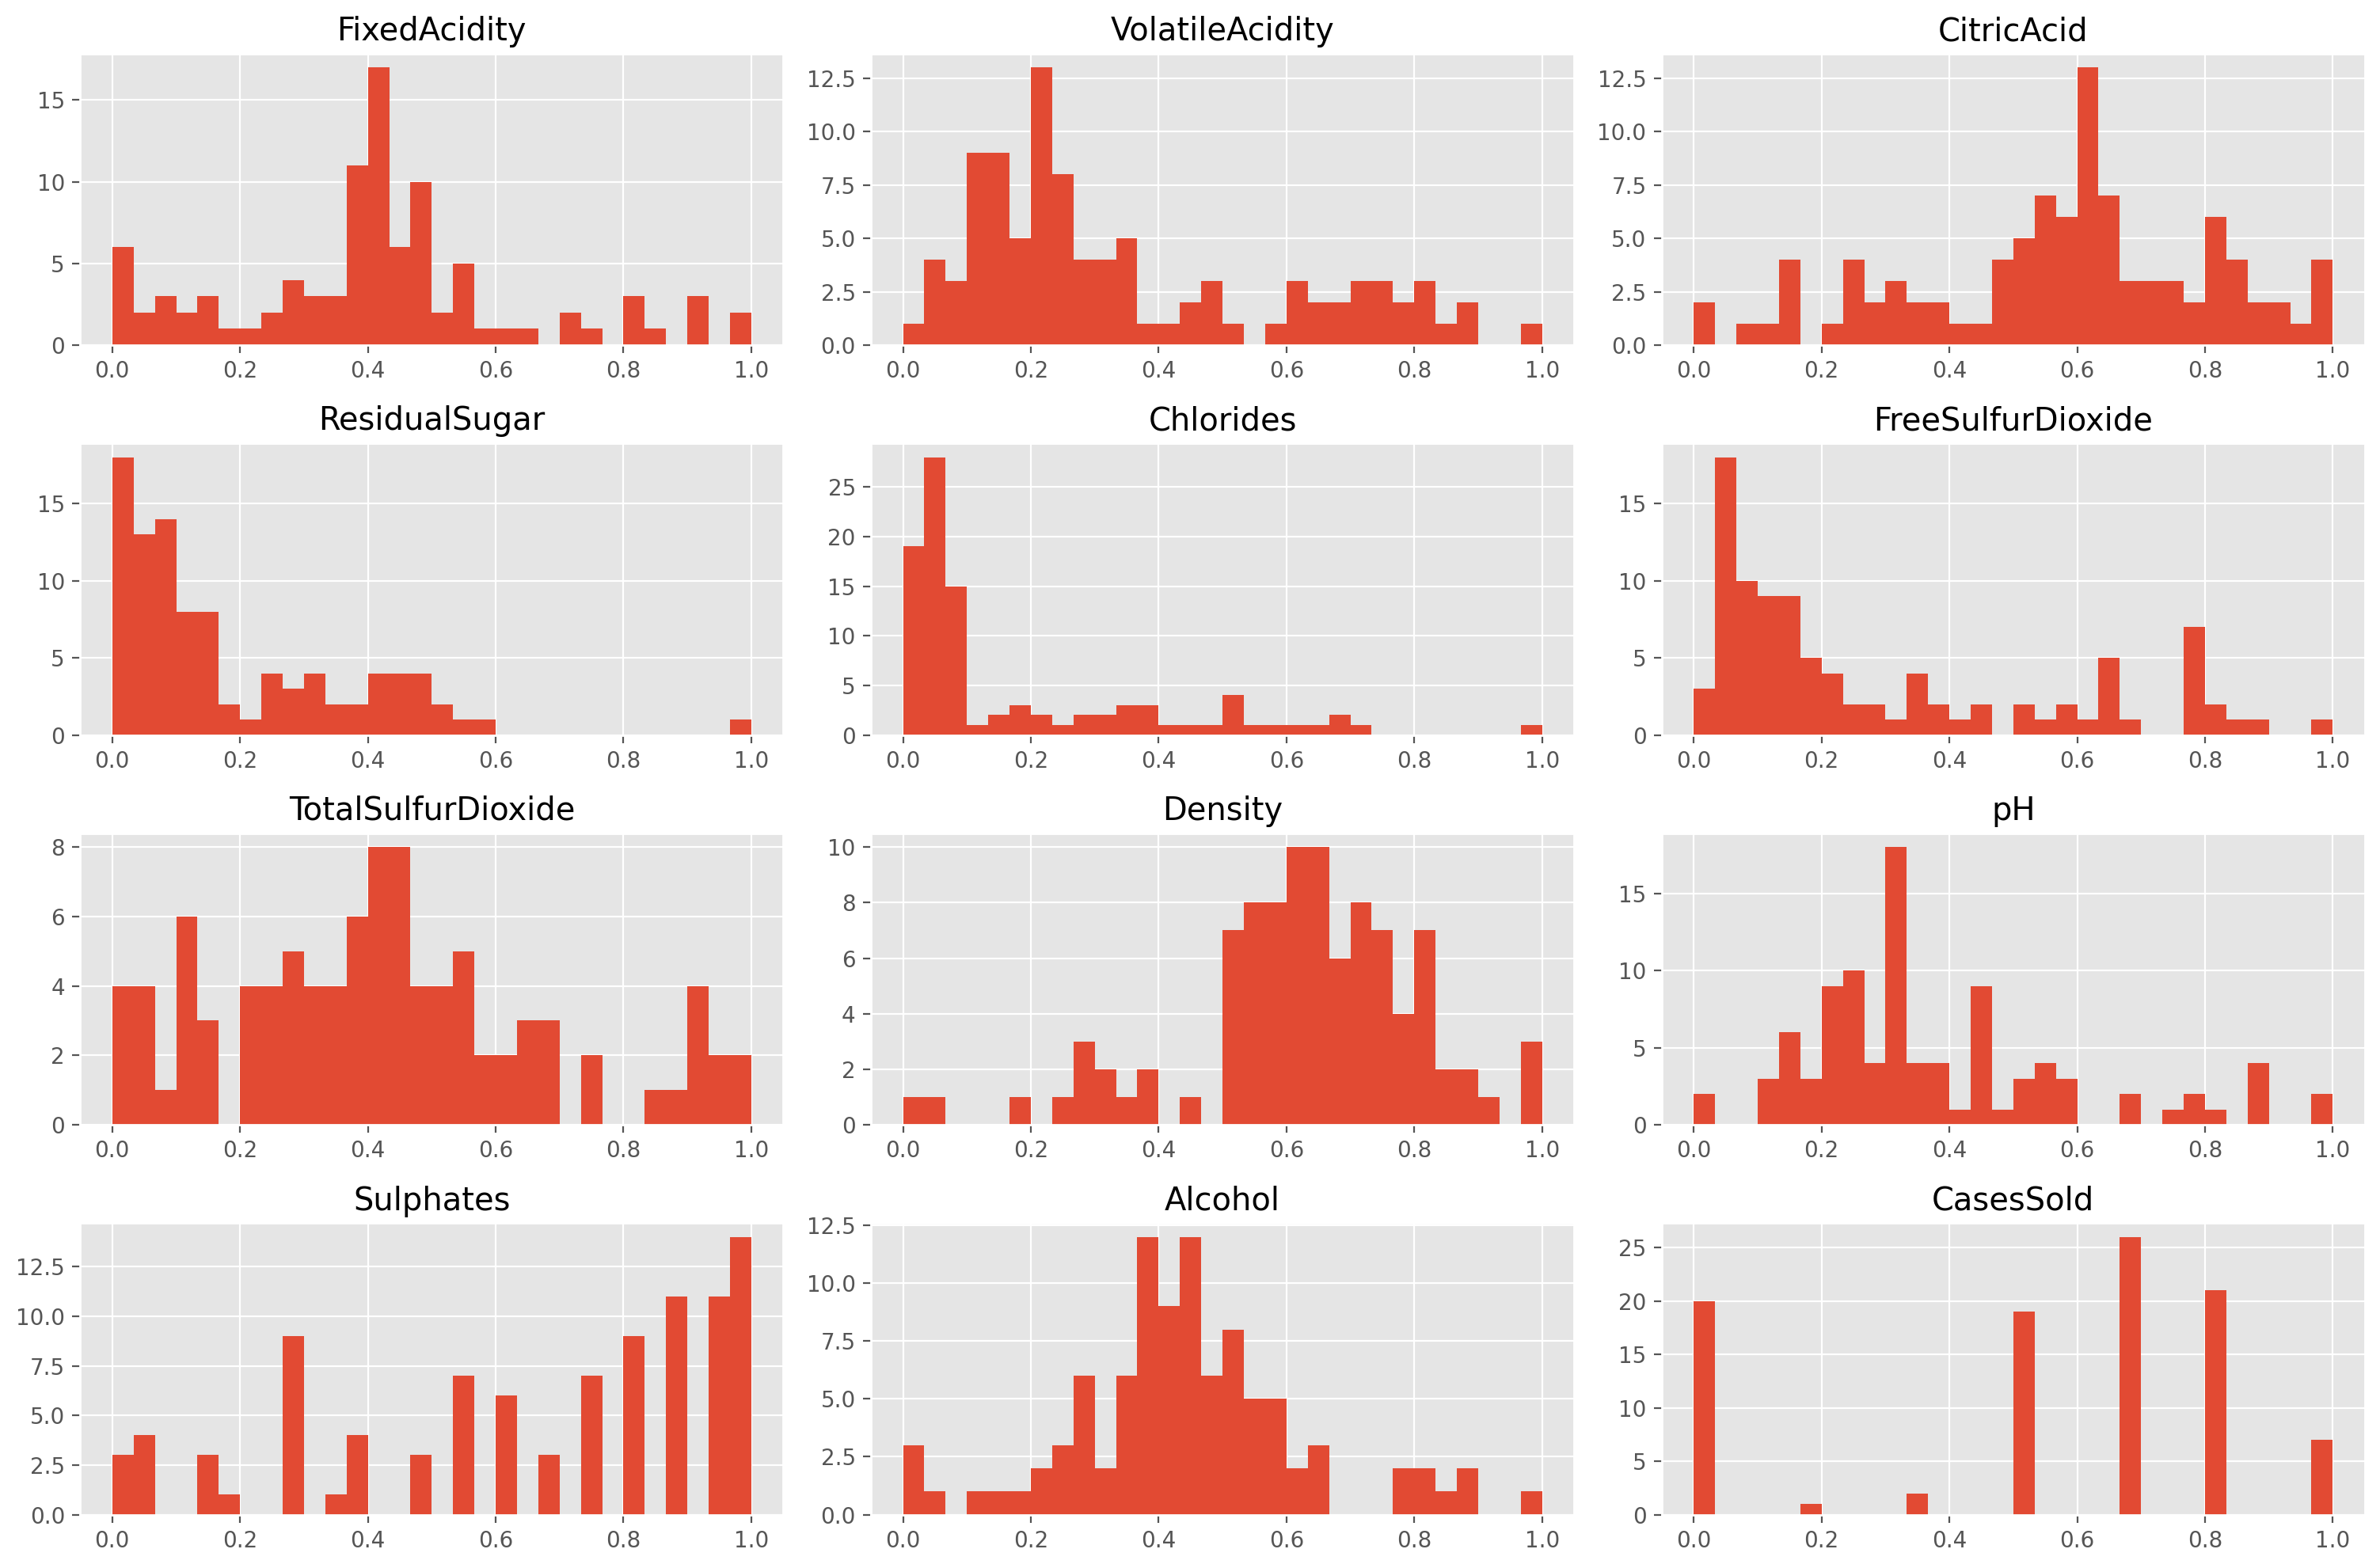

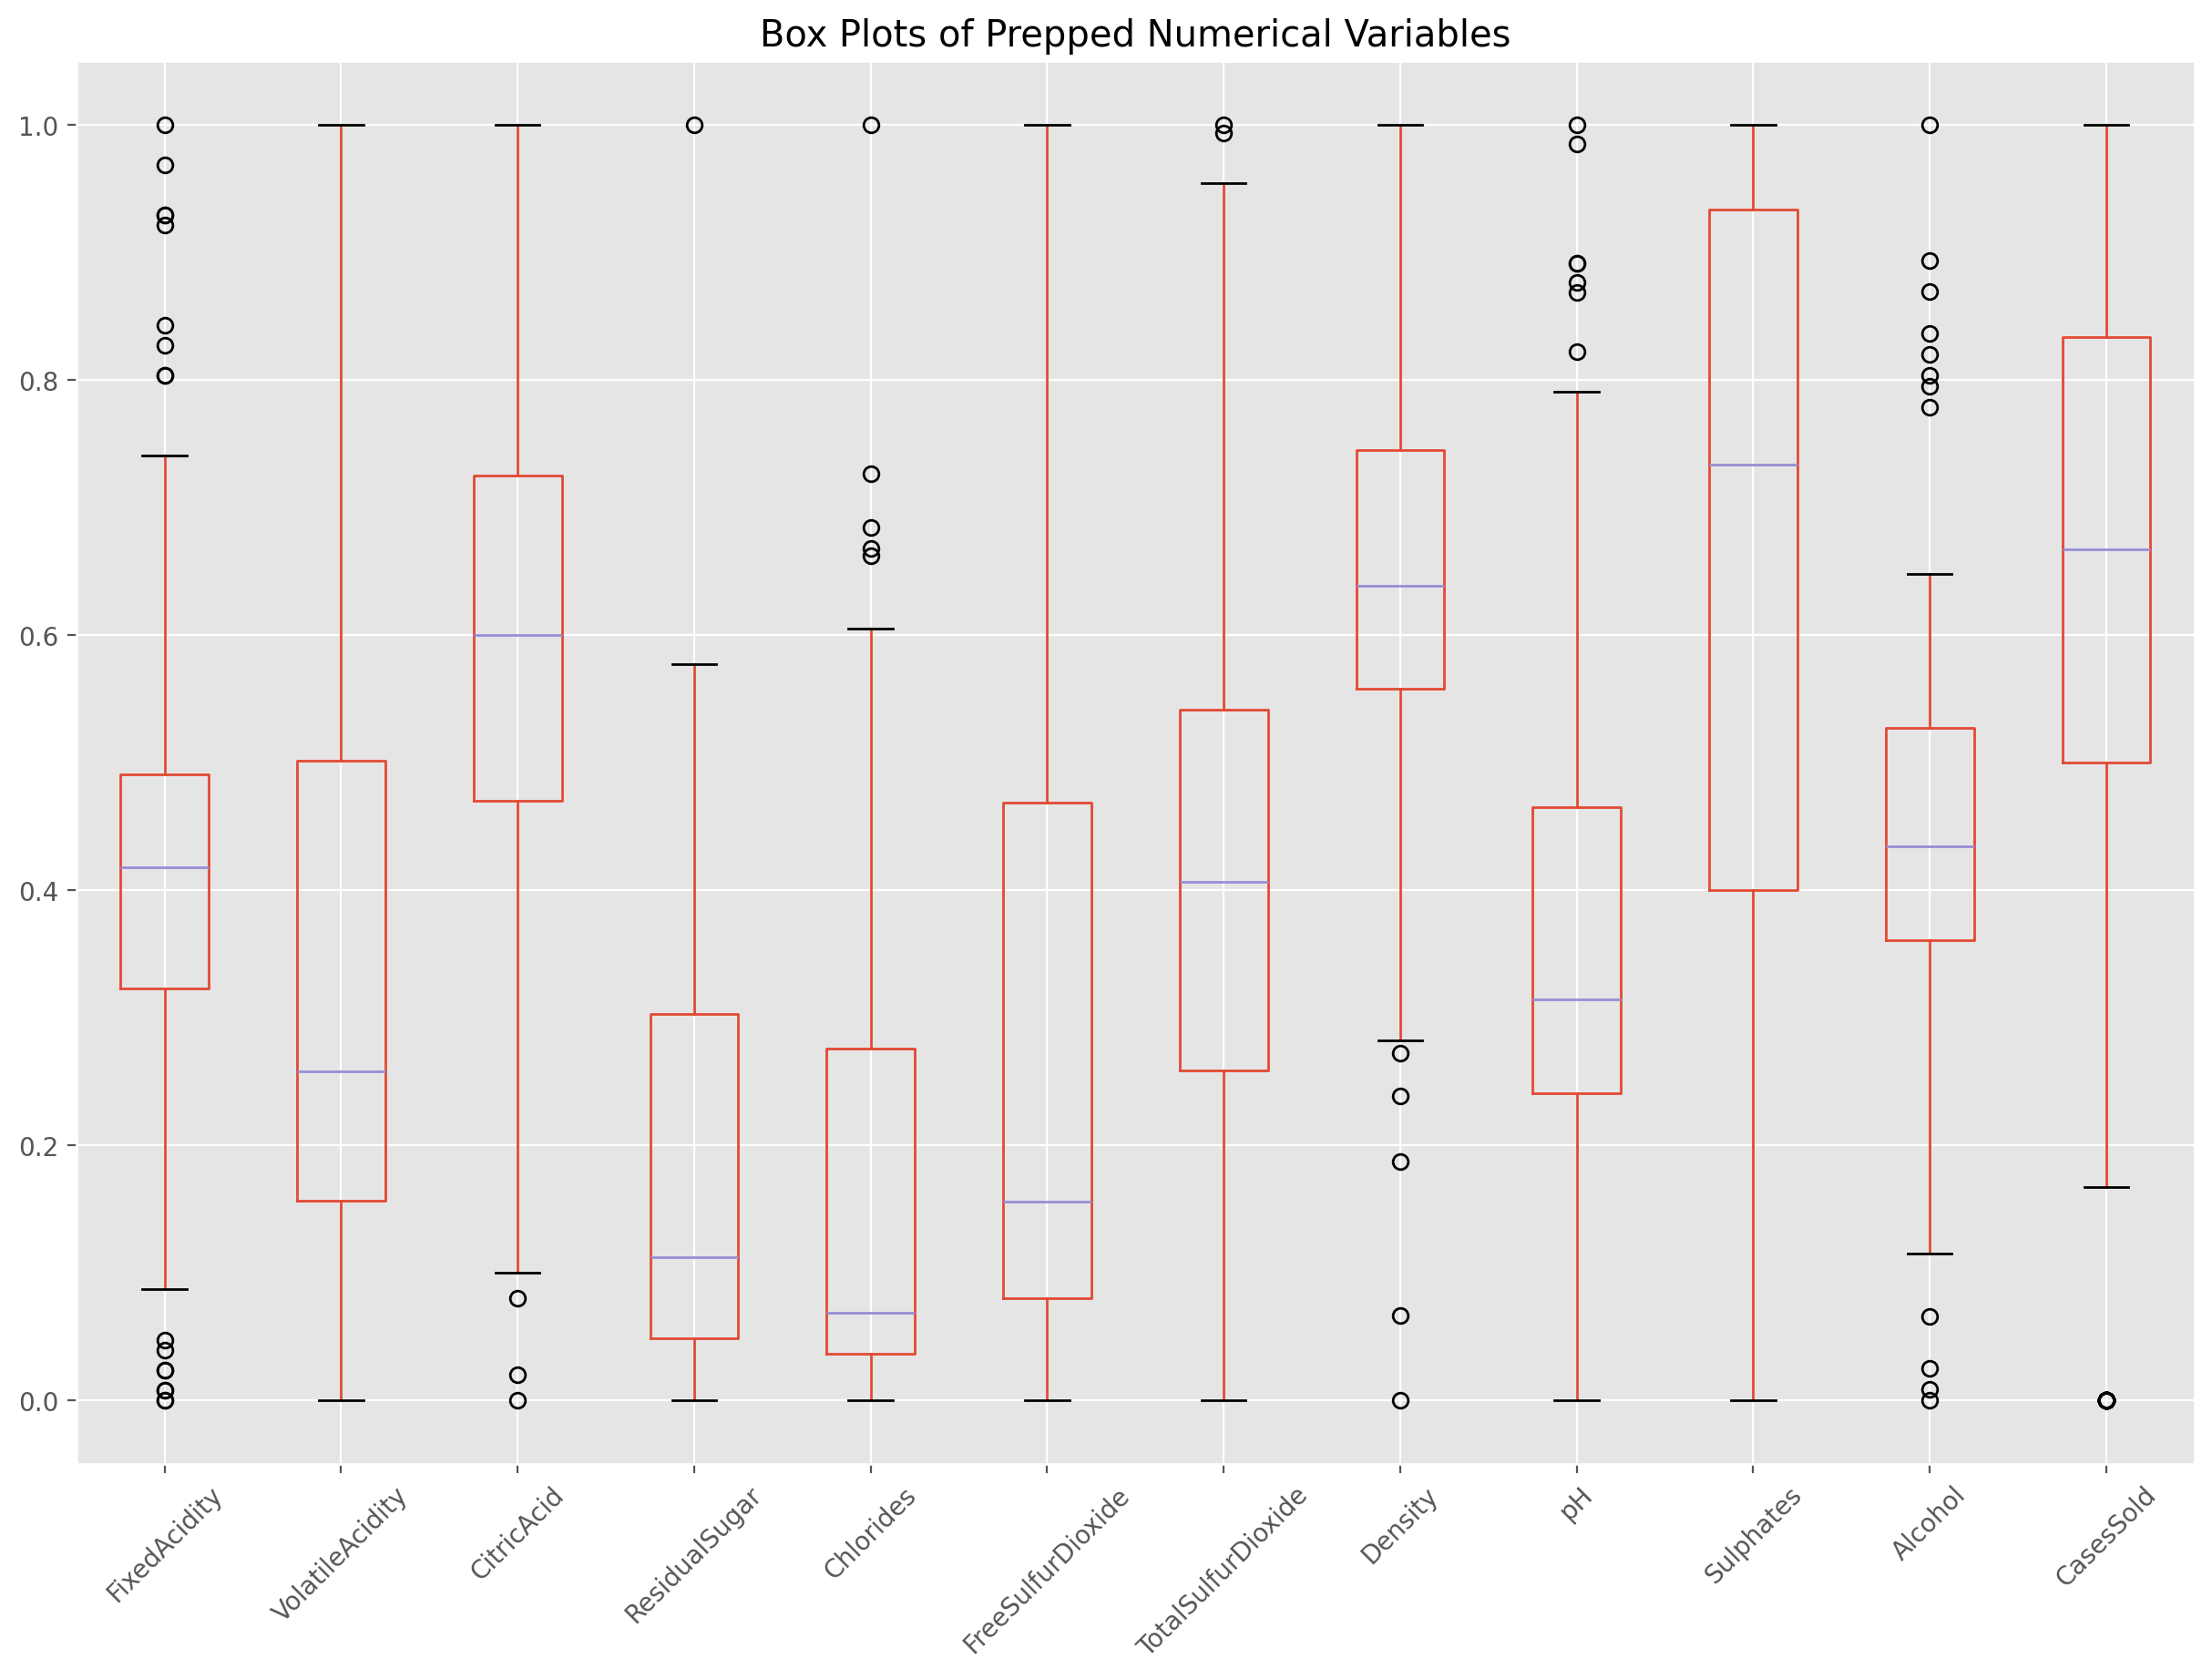

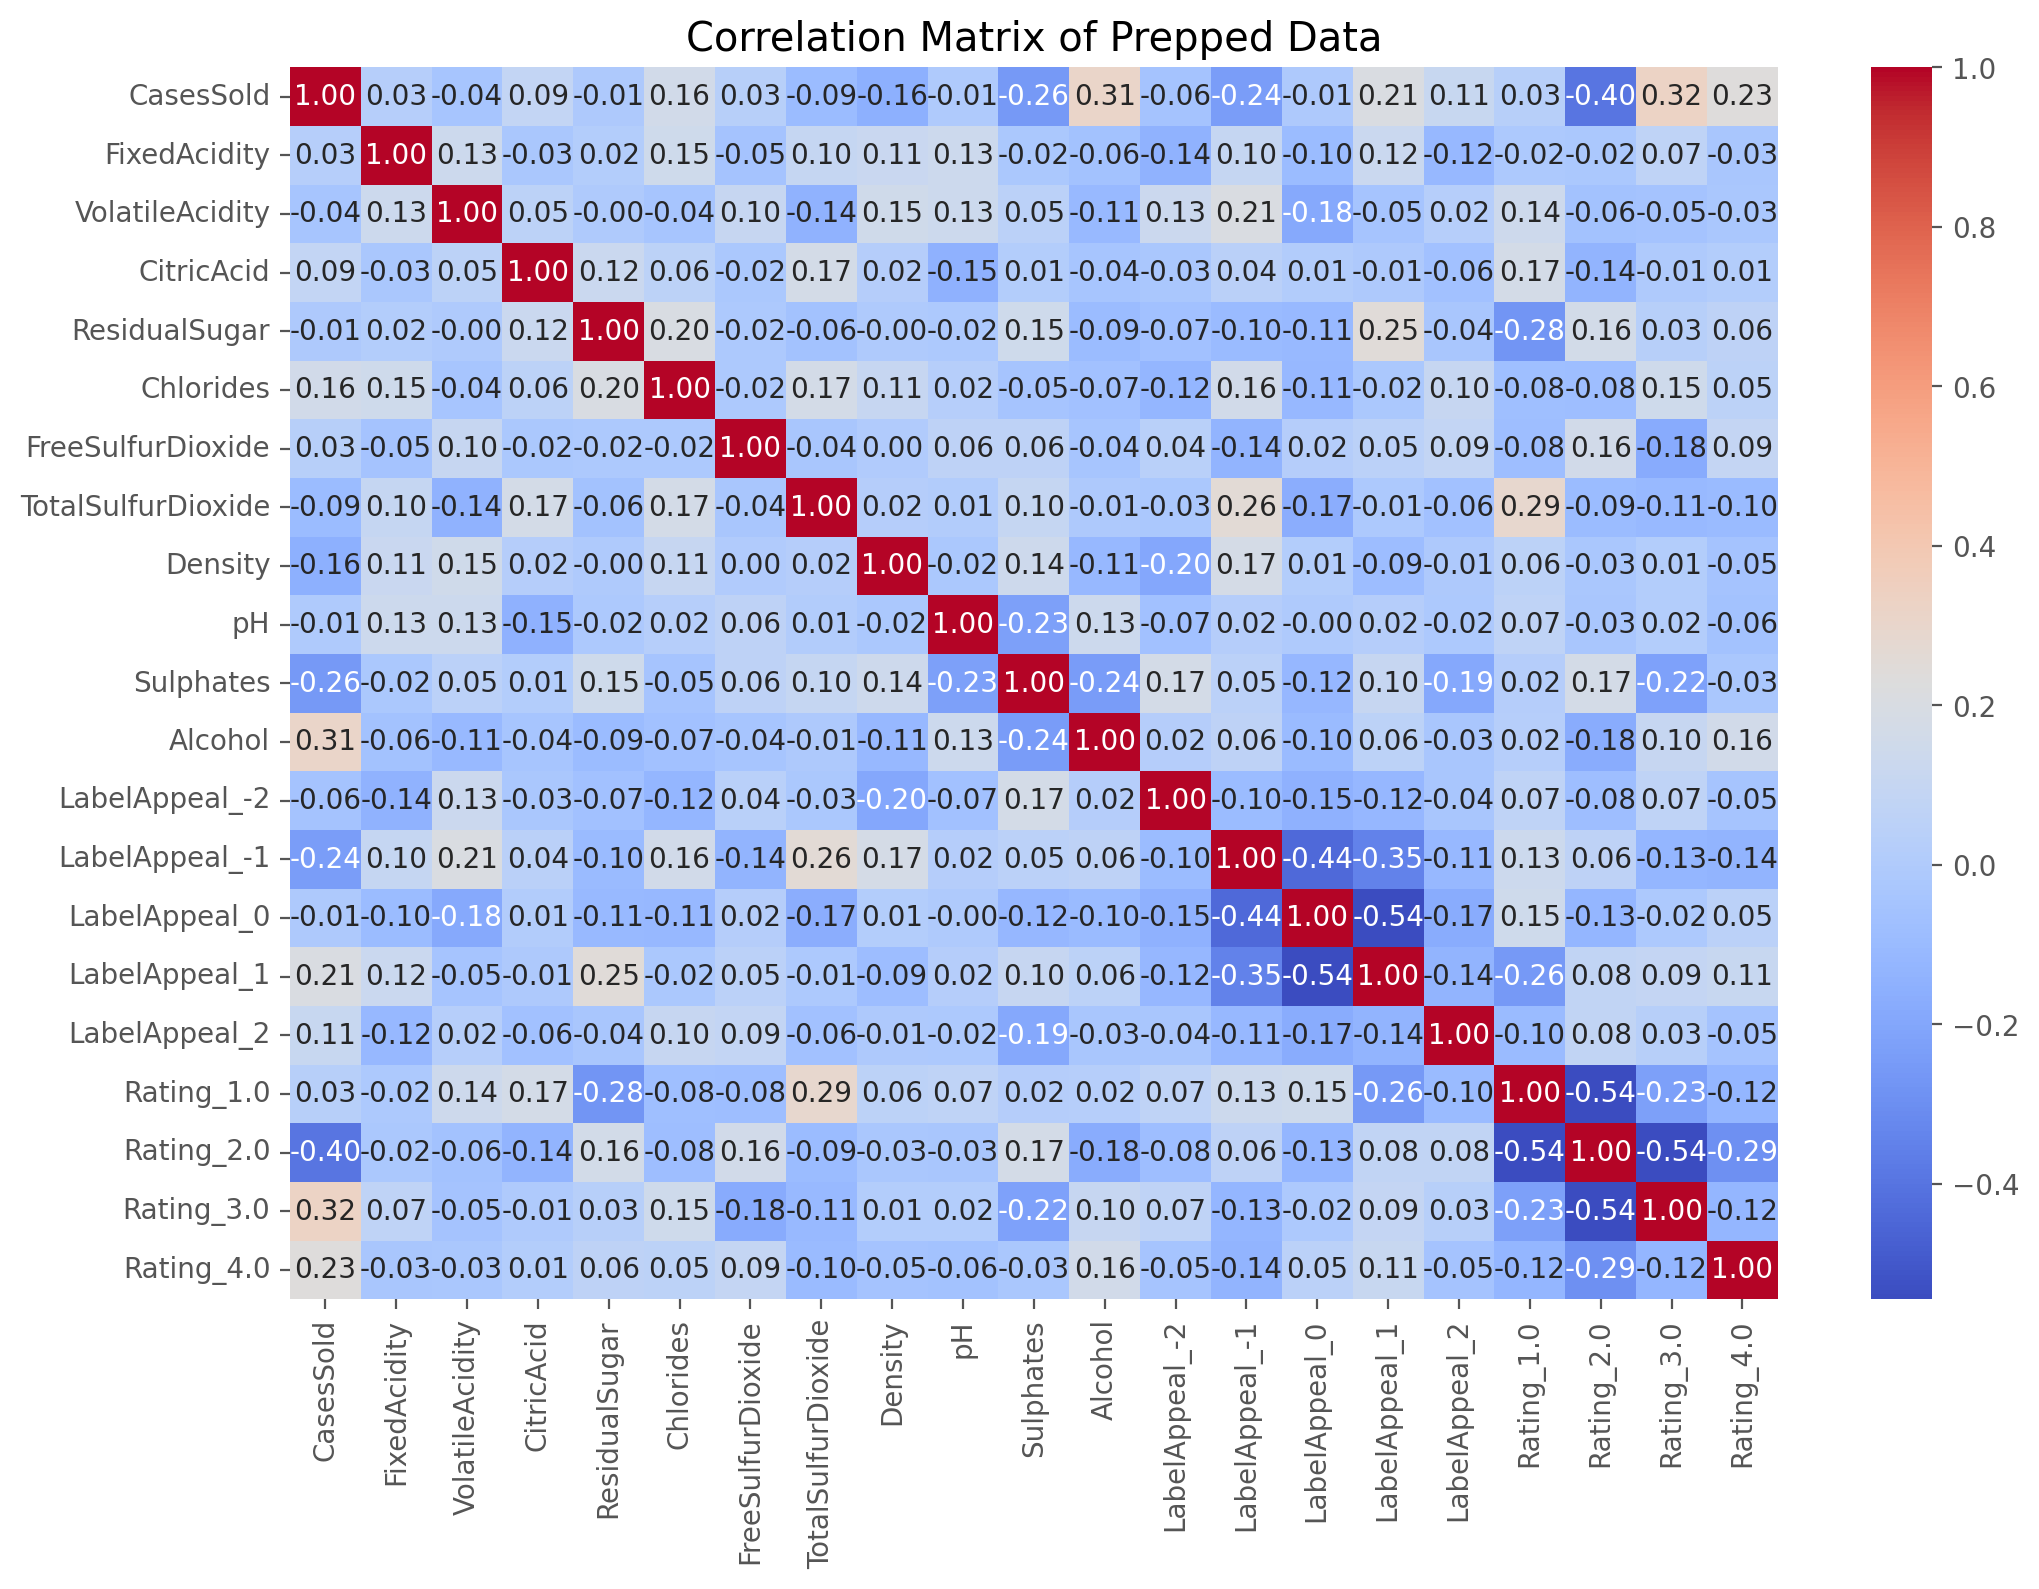

In [134]:
# Redefine numerical_cols based on current DataFrame columns
numerical_cols = ['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 
                  'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 
                  'pH', 'Sulphates', 'Alcohol', 'CasesSold']

# Proceed with visualizations
df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(15, 10))
df[numerical_cols].boxplot()
plt.xticks(rotation=45)
plt.title('Box Plots of Prepped Numerical Variables')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Prepped Data')
plt.show()

Comparison with Initial EDA:

* Distributions: Histograms show normalized ranges [0, 1], with negative values eliminated and outliers reduced. Distributions are less skewed (e.g., ResidualSugar).
* Outliers: Box plots indicate fewer outliers, with values now within domain ranges.
* Missing Values: All resolved, improving completeness.
* Correlations: Similar weak correlations with CasesSold, but dummy variables for LabelAppeal and Rating show clearer relationships (e.g., Rating_4 positively correlated).

<h2><u><b>Conclusion</b></u></h2>

The wine dataset was successfully cleaned and prepared for machine learning through a systematic process:

* EDA identified critical issues (negative values, missing data, outliers) and guided preparation.
* Data Preparation addressed these issues via absolute value correction, median/mode imputation, domain-based and IQR outlier removal, normalization, and categorical encoding.
* Post-Preparation EDA confirmed improvements in data quality, with normalized distributions, no missing values, and reduced outliers.
* The prepared dataset is now suitable for machine learning, with enhanced integrity and usability. Future work could explore non-linear models given weak correlations and test model performance to validate preparation efficacy.

<h3><u><b>References</b></u></h3>

* https://medium.com/@shreyasrivastav26/exploratory-data-analysis-on-wine-data-set-46ff17a42cd4
* https://www.kaggle.com/code/rutwikd95/eda-of-wine-dataset-and-classification-of-wine/notebook
* Class resources